# SALES PREDICTION USING PYTHON


### Sales prediction means predicting how much of a product people will buy based on factors such as the amount you spend to advertise your product, the segment of people you advertise for, or the platform you are advertising on about your product.



### Typically, a product and service-based business always need their Data Scientist to predict their future sales with every step they take to manipulate the cost of advertising their product. So let’s start the task of sales prediction with machine learning using Python.

## 1. Importing the Library:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

## 2. Reading the Dataset:

In [2]:
data2 = pd.read_csv("Advertising.csv")

In [3]:
data2.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


## 3. Exploratory Data Analysis:

In [4]:
data2.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [5]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


1. There are 5 columns.

2. Of which 4 columns are of float64 and 1 column of int64 datatypes.

In [6]:
data2.columns

Index(['Unnamed: 0', 'TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [7]:
print('The shape of the dataset is:', data2.shape)

The shape of the dataset is: (200, 5)


In [8]:
## Check for the null/missing values in the dataset:

data2.isnull().sum()

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

In [9]:
# Dropping the unneccessary features from the dataset

dff = data2.drop(['Unnamed: 0'], axis=1)
dff.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [11]:
print('The shape of the dataset after dropping the unneccessary feature is:', dff.shape)

The shape of the dataset after dropping the unneccessary feature is: (200, 4)


In [12]:
dff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


## BIVARIATE ANALYSIS:

In [13]:
dff.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


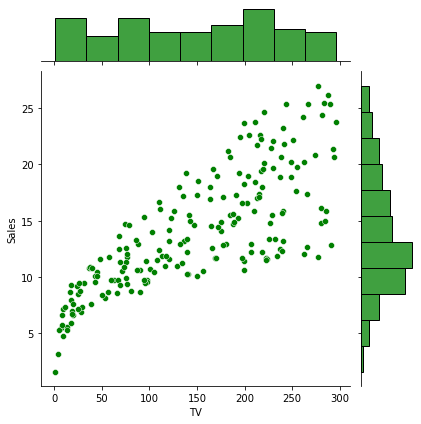

In [20]:
sns.jointplot(x = 'TV',y = 'Sales', data = dff, color='green')

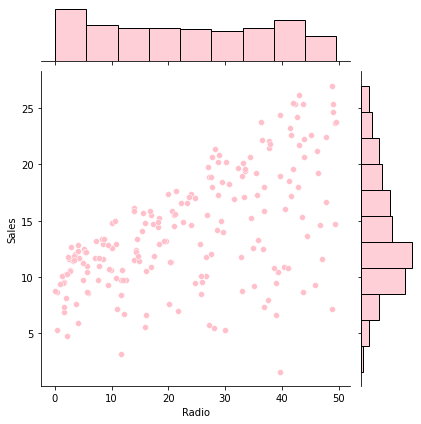

In [21]:
sns.jointplot(x = 'Radio',y = 'Sales', data = dff, color='pink')

## MULTIVARIATE ANALYSIS:

In [16]:
dff.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


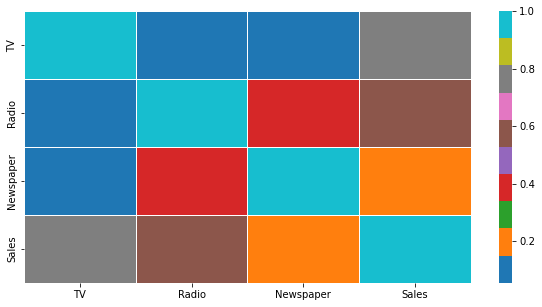

In [19]:
plt.figure(figsize=(10,5))

sns.heatmap(dff.corr(),linewidths='.5',fmt='.1f',cmap='tab10')

plt.show()

# Association is visually represented. Values closer to -1 or 1 shows that 2 variables are closely associated.

# Values closer to 0 shows that 2 variables are weakly associated.

### The variables that are highly correlated are : 

1. Radio/ Newspaper/ TV

2. Sales

## 4. Model Building:

In [22]:
X = dff.drop(columns='Sales')
#X is an indeoendent variable.

y = dff['Sales']
# is the target variable

In [23]:
X.describe()

,TV,Radio,Newspaper
count,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000
std,85.854236,14.846809,21.778621
min,0.700000,0.000000,0.300000
25%,74.375000,9.975000,12.750000
50%,149.750000,22.900000,25.750000
75%,218.825000,36.525000,45.100000
max,296.400000,49.600000,114.000000


In [24]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import zscore

X_Scaled = X.apply(zscore)
X_Scaled.describe().T

,count,mean,std,min,25%,50%,75%,max
TV,200.0,1.104672e-16,1.002509,-1.708823,-0.848530,0.031615,0.838195,1.744029
Radio,200.0,-4.413137e-16,1.002509,-1.570868,-0.897321,-0.024579,0.895430,1.778300
Newspaper,200.0,2.220446e-16,1.002509,-1.392646,-0.819550,-0.221137,0.669579,3.841171


In [26]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X_Scaled,y,test_size = 0.3,random_state=10)

In [28]:
# Checking the Dimensions of Training and Testing Data
print("The Shape of X_train dataset:", X_train.shape)
print("The Shape of X_Test dataset:", X_test.shape)
print("The Shape of Y_Train dataset:", y_train.shape)
print("The Shape of Y_Test dataset:", y_test.shape)

The Shape of X_train dataset: (140, 3)
The Shape of X_Test dataset: (60, 3)
The Shape of Y_Train dataset: (140,)
The Shape of Y_Test dataset: (60,)


In [34]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression(fit_intercept = True)

reg.fit(X_train, y_train)

LinearRegression()

In [35]:
print(f"Linear coefficients : {reg.coef_}")
print(f"Intercept : {reg.intercept_}")

Linear coefficients : [ 3.68520775  2.86599405 -0.08401343]
Intercept : 14.122070736568478


In [36]:
preds = reg.predict(X_test)
from sklearn import metrics
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, preds)))

Root Mean Squared Error: 2.3182000750787872


In [37]:
from sklearn.metrics import r2_score
r2_score(y_test, preds)

0.8567790678044408

In [38]:
import statsmodels.api as sm
X1 = sm.add_constant(X_Scaled)
est1 = sm.OLS(y, X1)
est_final = est1.fit()
print(est_final.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Wed, 21 Jun 2023   Prob (F-statistic):           1.58e-96
Time:                        12:27:12   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         14.0225      0.119    117.655      0.0

# THE END